# Introduction to NLP fundamentals in TensorFlow

## Check for GPU

In [1]:
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


## Get helper functions


In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

--2025-05-20 17:11:48--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-05-20 17:11:48 (70.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys, unzip_data

## Get a text dataset
Kaggle's intro to NLP dataset

In [4]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"
unzip_data("nlp_getting_started.zip")

--2025-05-20 17:12:09--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.12.207, 108.177.11.207, 74.125.26.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.008s  

2025-05-20 17:12:09 (74.5 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
# Shuffle training dataset
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [7]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
train_df.target.value_counts()

,count
target,
0,4342
1,3271


In [9]:
len(train_df), len(test_df)

(7613, 3263)

In [10]:
# Visualize random training
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not real disaster)
Text:
Deal of The Day : http://t.co/US0qQqhQVj Brand New DSERIALPCILP Lava Computer PCI Bus Dual Serial 16550 Board  #eÛ_ http://t.co/l0b14SJ7JB

---

Target: 1 (real disaster)
Text:
I came up with an idea of a fragrance concept for a bath bomb called The Blood of my Enemies. So you can say that's what you bathe in.

---

Target: 0 (not real disaster)
Text:
@Collapsed thank u

---

Target: 0 (not real disaster)
Text:
Woke up to Drake body bagging Meek again!! Meek u can't out spit ya girlfriend... Just lay down Man.... NOT Right... http://t.co/6CraEKc9wb

---

Target: 0 (not real disaster)
Text:
@Reddakushgodd she said a few months. But I get a curfew for out time smfh

---



### Split data into training and validation sets

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [13]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [14]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Converting text into numbers
Text vectorization (tokenization)

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens=10000,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=None,
                                    pad_to_max_tokens=True)

In [16]:
# find average number of tokens in training data
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [17]:
# Setup text vectorization variables
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [18]:
# Fit the text vextorizer to the training text
text_vectorizer.adapt(train_sentences)

In [19]:
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [20]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
top_5_words

['', '[UNK]', np.str_('the'), np.str_('a'), np.str_('in')]

### Creating an Embedding using an embedding layer

In [21]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                            #  embeddings_initializer="uniform",
                             input_length=max_length)
embedding

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


<Embedding name=embedding, built=False>

In [22]:
sample_embed = embedding(text_vectorizer([sample_sentence]))
sample_embed

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02377881, -0.0284182 , -0.04088675, ...,  0.04822915,
         -0.03244738, -0.00435951],
        [ 0.00860254, -0.03936354, -0.03197254, ...,  0.04930127,
         -0.04961786,  0.01457054],
        [-0.00554097,  0.03115613, -0.02913561, ...,  0.01084682,
         -0.03558468,  0.03813288],
        ...,
        [-0.04792039, -0.00715964, -0.01095774, ..., -0.02433874,
         -0.04679349, -0.00346557],
        [-0.04792039, -0.00715964, -0.01095774, ..., -0.02433874,
         -0.04679349, -0.00346557],
        [-0.04792039, -0.00715964, -0.01095774, ..., -0.02433874,
         -0.04679349, -0.00346557]]], dtype=float32)>

In [23]:
sample_embed[0][0], sample_embed[0][0].shape

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.02377881, -0.0284182 , -0.04088675, -0.03198882, -0.02427936,
         0.02195766,  0.04413554, -0.0040375 , -0.04684544,  0.02410349,
        -0.02638689, -0.00010508, -0.03875418, -0.00337808,  0.02391568,
         0.04607273,  0.0058424 , -0.02193217,  0.04560434,  0.02325262,
        -0.04841584,  0.0389077 ,  0.02356904, -0.02632182,  0.04594507,
         0.02273229, -0.04320331, -0.00420821,  0.01067411,  0.02582062,
        -0.00502279,  0.02273092, -0.0304556 ,  0.03408412, -0.03446021,
        -0.00429288,  0.01809478, -0.0461803 ,  0.04683541, -0.00528114,
        -0.04186311,  0.04094317, -0.02378207, -0.03657378,  0.0207891 ,
         0.00924515,  0.04755876,  0.04368931,  0.0177942 ,  0.00940547,
        -0.01389555, -0.04232346, -0.0346928 ,  0.02223099,  0.02187527,
        -0.01830758,  0.01987458,  0.04662771, -0.02141643, -0.02395893,
         0.04114873, -0.04492327,  0.00570884, -0.04704161, -0.04945477,
  

## Modelling

In [24]:
# Model 0: Baseline - Naive Bayes
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()),
                    ("clf", MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [25]:
# Evaluate
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [26]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [27]:
# Function to evaluate: accuracy, precision, recal, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}
  return model_results

In [28]:
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

# Model 1: simple dense model


In [29]:
# Create tensorboard callback
from helper_functions import create_tensorboard_callback
SAVE_DIR = "model_logs"
model_1_tensorboard_callback = create_tensorboard_callback(dir_name=SAVE_DIR,
                                                           experiment_name="simple_dense_model")

Saving TensorBoard log files to: model_logs/simple_dense_model/20250520-171212


In [30]:
# Build model with the functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [31]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_avg_pool_layer           │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,129 (4.88 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Compile
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [33]:
# Fit
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[model_1_tensorboard_callback])

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.6369 - loss: 0.6497 - val_accuracy: 0.7467 - val_loss: 0.5383
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.8119 - loss: 0.4605 - val_accuracy: 0.7874 - val_loss: 0.4758
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8641 - loss: 0.3509 - val_accuracy: 0.7874 - val_loss: 0.4573
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8906 - loss: 0.2903 - val_accuracy: 0.7900 - val_loss: 0.4600
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9087 - loss: 0.2442 - val_accuracy: 0.7848 - val_loss: 0.4800


In [34]:
model_1.evaluate(val_sentences, val_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7737 - loss: 0.5140


[0.47998684644699097, 0.7847769260406494]

In [35]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape, model_1_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


((762, 1),
 array([[0.33654517],
        [0.7452862 ],
        [0.99773276],
        [0.11747275],
        [0.11716841],
        [0.9389676 ],
        [0.90749454],
        [0.99326074],
        [0.9596628 ],
        [0.23956984]], dtype=float32))

In [36]:
# Convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [37]:
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.4776902887139,
 'precision': 0.7914526971511877,
 'recall': 0.7847769028871391,
 'f1': 0.7811320906944169}

In [38]:
# Create embedding files
import io
words_in_vocab = text_vectorizer.get_vocabulary()
weights = model_1.get_layer("embedding").get_weights()[0]
out_v = io.open("vectors.tsv", "w", encoding="utf-8")
out_m = io.open("metadata.tsv", "w", encoding="utf-8")

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue
  vec = weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [39]:
# try:
#   from google.colab import files
#   files.download('vectors.tsv')
#   files.download('metadata.tsv')
# except:
#   pass

## Recurrent neural networks

### Model 2: LSTM
Long Short Term Memory

In [40]:
# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [41]:
model_2.summary()

Model: "model_2_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,329,473 (5.07 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [43]:
# Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[model_1_tensorboard_callback])

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8611 - loss: 0.3198 - val_accuracy: 0.7822 - val_loss: 0.5799
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9403 - loss: 0.1604 - val_accuracy: 0.7822 - val_loss: 0.6203
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9560 - loss: 0.1200 - val_accuracy: 0.7690 - val_loss: 0.7463
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9637 - loss: 0.1038 - val_accuracy: 0.7769 - val_loss: 0.8834
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9692 - loss: 0.0840 - val_accuracy: 0.7769 - val_loss: 0.9732


In [44]:
# Make predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


((762, 1),
 array([[2.2564442e-03],
        [7.4383771e-01],
        [9.9976879e-01],
        [1.1639900e-01],
        [7.3099619e-04],
        [9.9955225e-01],
        [9.8478949e-01],
        [9.9982852e-01],
        [9.9976873e-01],
        [7.6338828e-01]], dtype=float32))

In [45]:
# Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [46]:
# Calculate model 2 results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 77.69028871391076,
 'precision': 0.7781874595396938,
 'recall': 0.7769028871391076,
 'f1': 0.7751243211017478}

### Model 3: GRU
Gated Recurrent Unit

In [47]:
# Create an GRU model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.GRU(64, return_sequences=True)(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [48]:
# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [49]:
# Fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[model_1_tensorboard_callback])

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8785 - loss: 0.2730 - val_accuracy: 0.7638 - val_loss: 0.7072
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9715 - loss: 0.0810 - val_accuracy: 0.7756 - val_loss: 0.7690
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9742 - loss: 0.0711 - val_accuracy: 0.7743 - val_loss: 0.8848
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9784 - loss: 0.0544 - val_accuracy: 0.7782 - val_loss: 1.0268
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9785 - loss: 0.0484 - val_accuracy: 0.7756 - val_loss: 1.1801


In [50]:
# Make predictions with GRU model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


((762, 1),
 array([[1.7437979e-03],
        [7.8887451e-01],
        [9.9947459e-01],
        [6.6366591e-02],
        [5.8681071e-05],
        [9.9804354e-01],
        [6.7289346e-01],
        [9.9970257e-01],
        [9.9962747e-01],
        [2.4286738e-01]], dtype=float32))

In [51]:
# Convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [52]:
# Calculate model 3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.55905511811024,
 'precision': 0.7780461459912817,
 'recall': 0.7755905511811023,
 'f1': 0.7732287214395843}

### Model 4: Bidirectional LSTM

In [53]:
# build bidirectional RNN
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

In [54]:
model_4.summary()

Model: "model_4_bidirectional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 15, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,453,441 (5.54 MB)

 Trainable params: 1,453,441 (5.54 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [56]:
# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[model_1_tensorboard_callback])

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step - accuracy: 0.9524 - loss: 0.1697 - val_accuracy: 0.7717 - val_loss: 0.9076
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.9771 - loss: 0.0528 - val_accuracy: 0.7625 - val_loss: 1.3367
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9770 - loss: 0.0469 - val_accuracy: 0.7717 - val_loss: 1.2924
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - accuracy: 0.9787 - loss: 0.0451 - val_accuracy: 0.7690 - val_loss: 1.1269
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9793 - loss: 0.0445 - val_accuracy: 0.7612 - val_loss: 1.4419


In [57]:
# Make predictions
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs.shape, model_4_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step


((762, 1),
 array([[1.6656165e-03],
        [5.6592220e-01],
        [9.9996293e-01],
        [1.1956698e-01],
        [7.3564461e-06],
        [9.9994260e-01],
        [9.5398247e-01],
        [9.9998719e-01],
        [9.9997699e-01],
        [6.3480008e-01]], dtype=float32))

In [58]:
# Convert model 4 pred probs to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [59]:
# Calculate model 4 results
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 76.11548556430446,
 'precision': 0.7625228137873495,
 'recall': 0.7611548556430446,
 'f1': 0.7589888106092002}

### Model 5: Convolutional neural betworks for text

In [60]:
# build Convolutional neural betwork
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu", padding="valid")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_cnn")

In [61]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [62]:
model_5.summary()

Model: "model_5_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 11, 32)         │        20,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 32)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,300,545 (4.96 MB)

 Trainable params: 1,300,545 (4.96 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[model_1_tensorboard_callback])

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9368 - loss: 0.1987 - val_accuracy: 0.7730 - val_loss: 0.8253
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9740 - loss: 0.0735 - val_accuracy: 0.7651 - val_loss: 0.9242
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9755 - loss: 0.0617 - val_accuracy: 0.7664 - val_loss: 1.0744
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9764 - loss: 0.0557 - val_accuracy: 0.7598 - val_loss: 1.1423
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9815 - loss: 0.0461 - val_accuracy: 0.7638 - val_loss: 1.1492


In [64]:
# Make predictions
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs.shape, model_5_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


((762, 1),
 array([[2.0307550e-01],
        [8.1994659e-01],
        [9.9975049e-01],
        [2.5985951e-02],
        [3.3093107e-07],
        [9.9875706e-01],
        [9.2184532e-01],
        [9.9994344e-01],
        [9.9999940e-01],
        [3.7952077e-01]], dtype=float32))

In [65]:
# Convert model 5 pred probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [66]:
# Calculate model 5 results
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 76.37795275590551,
 'precision': 0.7647678424871814,
 'recall': 0.7637795275590551,
 'f1': 0.761896339990086}

### Model 6: TensorFlow hub pretrained sentence encoder

In [67]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                       "When you can the universal sentence encoder on a sentence, it turns it into numbers."])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157025  0.02485911  0.02878051 -0.012715    0.03971541  0.08827761
  0.02680988  0.05589838 -0.01068731 -0.00597293  0.00639321 -0.01819516
  0.00030816  0.09105889  0.05874645 -0.03180629  0.01512474 -0.05162925
  0.00991366 -0.06865345 -0.04209306  0.0267898   0.03011009  0.00321065
 -0.00337968 -0.04787356  0.0226672  -0.00985927 -0.04063615 -0.01292093
 -0.04666382  0.05630299 -0.03949255  0.00517682  0.02495827 -0.07014439
  0.0287151   0.0494768  -0.00633978 -0.08960193  0.02807119 -0.00808364
 -0.01360601  0.05998649 -0.10361788 -0.05195372  0.00232958 -0.02332531
 -0.03758106  0.03327729], shape=(50,), dtype=float32)


In [68]:
embed_samples[0].shape

TensorShape([512])

In [69]:
# Create a keras ayer using the USE pretrained layer from tensorflow hub
import tf_keras
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [70]:
model_6 = tf_keras.Sequential([
    sentence_encoder_layer,
    tf_keras.layers.Dense(64, activation="relu"),
    tf_keras.layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

In [71]:
# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf_keras.optimizers.Adam(),
                metrics=["accuracy"])

In [72]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [73]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 9s 22ms/step - loss: 0.5066 - accuracy: 0.7837 - val_loss: 0.4454 - val_accuracy: 0.8018
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4148 - accuracy: 0.8149 - val_loss: 0.4383 - val_accuracy: 0.8097
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4008 - accuracy: 0.8215 - val_loss: 0.4318 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3917 - accuracy: 0.8240 - val_loss: 0.4340 - val_accuracy: 0.8058
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3855 - accuracy: 0.8267 - val_loss: 0.4385 - val_accuracy: 0.8097


In [74]:
# Make predictions
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs.shape, model_6_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


((762, 1),
 array([[0.13856915],
        [0.7414772 ],
        [0.9873434 ],
        [0.17593081],
        [0.6723604 ],
        [0.658847  ],
        [0.97833526],
        [0.9729889 ],
        [0.9295309 ],
        [0.07920812]], dtype=float32))

In [75]:
# Convert model 6 pred probs to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [76]:
# Calculate model 6 results
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 80.97112860892388,
 'precision': 0.8168846986623768,
 'recall': 0.8097112860892388,
 'f1': 0.8066992110039145}

### Model 7: TF Hub pretrained USE 10% training data

In [77]:
## NOTE: data splits like this lead to data leakeage

# Create subsets of 10% of training data
train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
# train_10_percent.head()
train_sentences_10_percent = train_10_percent["text"]
train_labels_10_percent = train_10_percent["target"]

In [78]:
# correct dataset split
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [79]:
model_7 = tf_keras.models.clone_model(model_6)

In [80]:
model_7.compile(loss="binary_crossentropy",
                optimizer=tf_keras.optimizers.Adam(),
                metrics=["accuracy"])

In [81]:
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [82]:
# Train a classifier on top of USE pretrained embeddings
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
22/22 [==============================] - 6s 69ms/step - loss: 0.6699 - accuracy: 0.6745 - val_loss: 0.6458 - val_accuracy: 0.7507
Epoch 2/5
22/22 [==============================] - 1s 28ms/step - loss: 0.6035 - accuracy: 0.8044 - val_loss: 0.5903 - val_accuracy: 0.7651
Epoch 3/5
22/22 [==============================] - 1s 23ms/step - loss: 0.5331 - accuracy: 0.8131 - val_loss: 0.5397 - val_accuracy: 0.7677
Epoch 4/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4737 - accuracy: 0.8292 - val_loss: 0.5087 - val_accuracy: 0.7743
Epoch 5/5
22/22 [==============================] - 0s 23ms/step - loss: 0.4322 - accuracy: 0.8321 - val_loss: 0.4908 - val_accuracy: 0.7717


In [83]:
# Make predictions
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs.shape, model_7_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


((762, 1),
 array([[0.21991928],
        [0.5310468 ],
        [0.92946213],
        [0.40126896],
        [0.53160846],
        [0.6996456 ],
        [0.9030277 ],
        [0.8371297 ],
        [0.86042094],
        [0.1886595 ]], dtype=float32))

In [84]:
# Convert model 7 pred probs to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [85]:
# Calculate model 7 results
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

{'accuracy': 77.16535433070865,
 'precision': 0.7724094757924029,
 'recall': 0.7716535433070866,
 'f1': 0.7700698633249685}

### Comparing models

In [86]:
# Combine results into a dataframe
all_model_results = pd.DataFrame({
    "0_baseline": baseline_results,
    "1_simple_dense": model_1_results,
    "2_lstm": model_2_results,
    "3_gru": model_3_results,
    "4_bidirectional": model_4_results,
    "5_cnn": model_5_results,
    "6_use": model_6_results,
    "7_use_10_percent": model_7_results
    }).transpose()
all_model_results["accuracy"] = all_model_results["accuracy"]/100

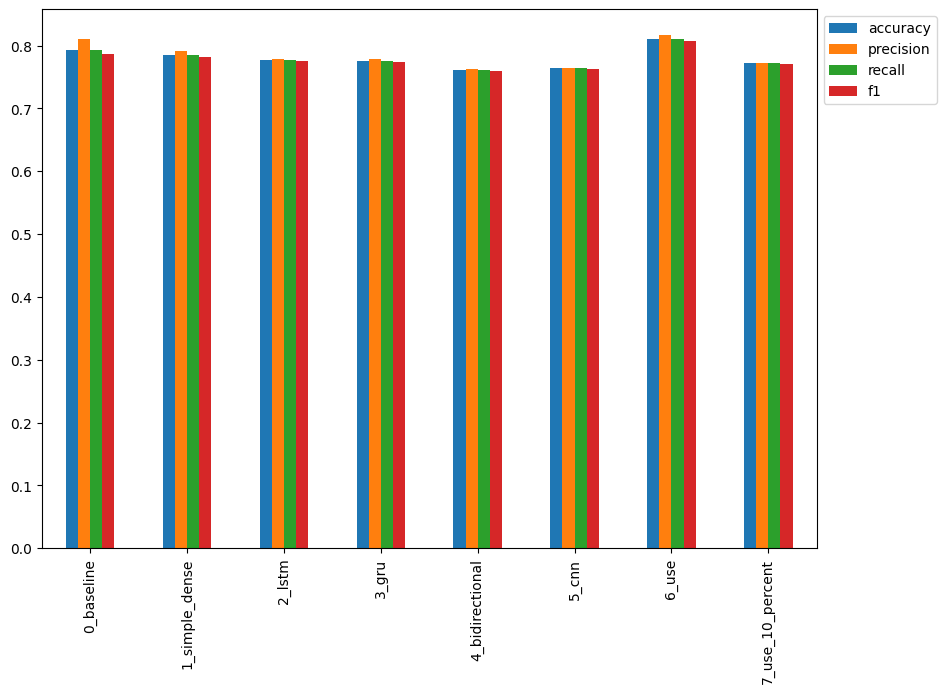

In [87]:
# plot and compare all_model_results
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0, 1.0))


<Axes: >

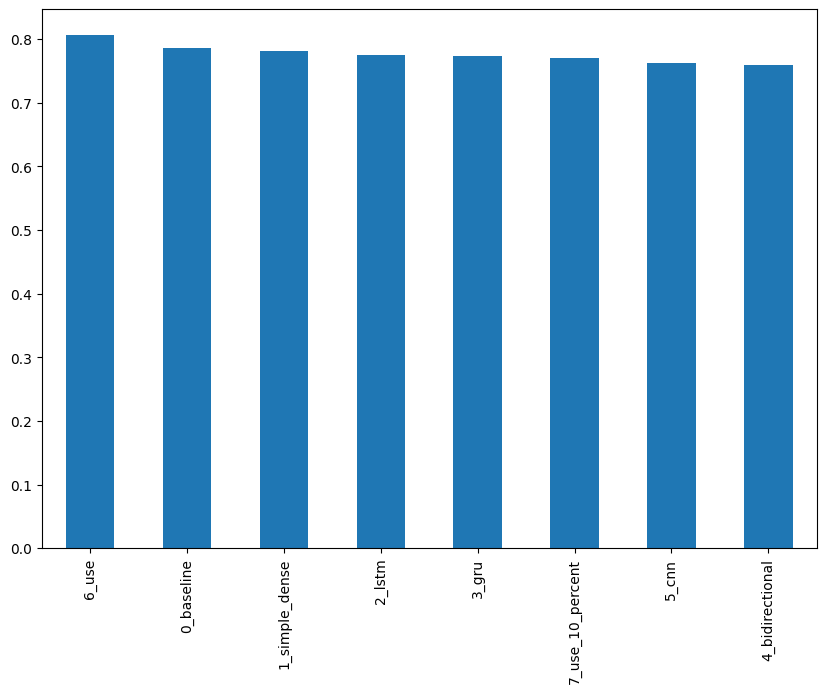

In [88]:
# Sort by f1 score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10,7))

### Saving and loading a trained model

In [89]:
# save model 6 to HDF5 format
model_6.save("model_6.h5")

/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [90]:
# load saved model_6
loaded_model_6 = loaded_model_6 = tf_keras.models.load_model("model_6.h5",custom_objects={
        "KerasLayer": hub.KerasLayer
    })

In [91]:
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4385 - accuracy: 0.8097


[0.43848249316215515, 0.8097112774848938]

In [92]:
# save model 6 to SavedModel format
model_6.save("model_6_saved_model_format")

In [93]:
# load saved model_6
loaded_model_6_SavedModel = loaded_model_6 = tf_keras.models.load_model("model_6_saved_model_format")

In [94]:
loaded_model_6_SavedModel.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4385 - accuracy: 0.8097


[0.43848249316215515, 0.8097112774848938]

## Find most wrong example

In [95]:
# download pretrained model from google storage
!wget "https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip"
!unzip 08_model_6_USE_feature_extractor.zip

--2025-05-20 17:18:22--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.98.207, 142.251.107.207, 74.125.196.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  43.9MB/s    in 14s     

2025-05-20 17:18:36 (64.0 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.

In [96]:
model_6_pretrained = tf_keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 17ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723119258880615, 0.8162729740142822]

In [97]:
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_pred = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_pred[:10]

24/24 [==============================] - 1s 10ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [98]:
# Create dataframe with validation sentences and best prforming model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_pretrained_pred,
                       "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [99]:
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [101]:
# check false positives
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.9101957082748413
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.8769820928573608
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8523001670837402
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.8354544043540955
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1, Prob: 0.8272131681442261
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

Target: 0, Pred: 1, Prob: 0.814815878868103
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0,

In [102]:
# check false negatives
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.06730344891548157
Text:
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Pred: 0, Prob: 0.055075839161872864
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0, Prob: 0.054603394120931625
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0, Prob: 0.05459701269865036
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0, Prob: 0.04963730275630951
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0, Prob: 0.04391848295927048
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target: 1, Pred: 0, Prob: 0.04208683967590

In [105]:
# making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 49ms/step
Pred: 1, Prob: 0.921026349067688
Text:
Why does the secret bunker used by Cheney during 9/11 look like it was catered when ktchn staff had been evacuated?

----

1/1 [==============================] - 0s 45ms/step
Pred: 1, Prob: 0.8284642100334167
Text:
California wild fires blow my mind every time

----

1/1 [==============================] - 0s 53ms/step
Pred: 0, Prob: 0.1255895048379898
Text:
Eish even drake killing niggas eish game is really watered down a singing nigga body bagging rappers.. smh

----

1/1 [==============================] - 0s 48ms/step
Pred: 1, Prob: 0.9284563660621643
Text:
Buildings on fire behind Tisa's in Niceville @tristapnwfdn https://t.co/ACl1baBacR

----

1/1 [==============================] - 0s 48ms/step
Pred: 0, Prob: 0.04554056003689766
Text:
Tonight It's Going To Be Mayhem @ #4PlayThursdays. Everybody Free w/ Text. 1716 I ST NW (18+) http://t.co/omYWCLpGEf

----

1/1 [==============================]

### Speed - score trade off

In [106]:
# function to measure time of prediction
import time
def pred_timer(model, samples):
  start_time = time.perf_counter()
  model.predict(samples)
  end_time = time.perf_counter()
  total_time = end_time - start_time
  time_per_pred = total_time / len(samples)
  return total_time, time_per_pred

In [107]:
# calculate TF hub sentence encoder time pre pred
model_6_pretrained_total_time, model_6_pretrained_time_per_pred = pred_timer(model_6_pretrained, val_sentences)
print(f"Total time: {model_6_pretrained_total_time} { model_6_pretrained_time_per_pred }")

24/24 [==============================] - 1s 28ms/step
Total time: 1.4215029459996913 0.0018654894304457892


In [109]:
# calculate baseline model times per pred
baseline_total_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
print(f"Total time: {baseline_total_time} { baseline_time_per_pred }")

Total time: 0.06909461199984435 9.067534383181673e-05


In [110]:
model_6_pretrained_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_pretrained_pred)
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1': 0.8148082644367335}

Text(0, 0.5, 'F1 score')

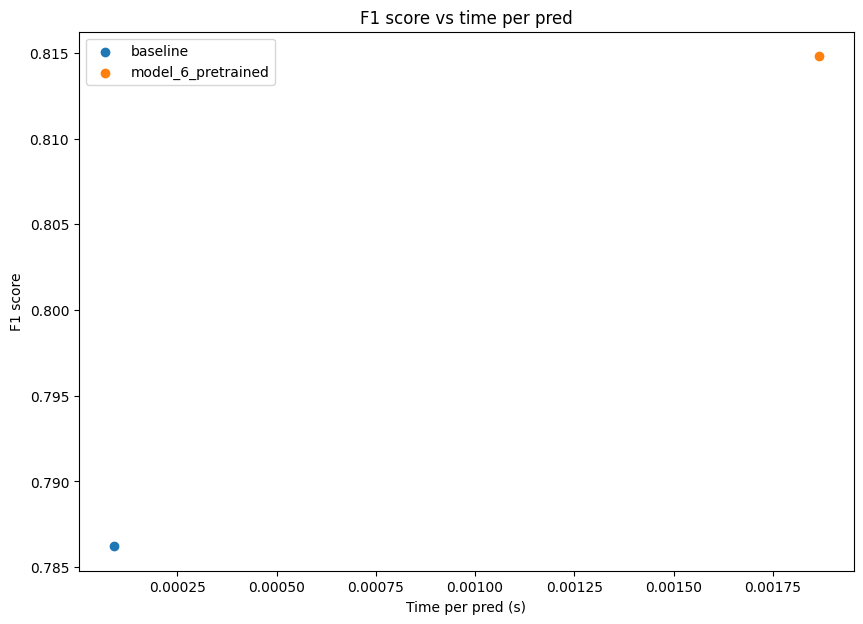

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_pretrained_time_per_pred, model_6_pretrained_results["f1"], label="model_6_pretrained")
plt.legend()
plt.title("F1 score vs time per pred")
plt.xlabel("Time per pred (s)")
plt.ylabel("F1 score")
# plt.grid()